In [1]:
!pip install -q gradio

     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 206 kB 58.9 MB/s 
     |████████████████████████████████| 1.9 MB 45.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 961 kB 62.7 MB/s 
     |████████████████████████████████| 3.0 MB 44.5 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
tf_model_url = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
label_map_url = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
image_shape= (321, 321)

In [4]:
# import layers from model url
classifier = tf.keras.Sequential([hub.KerasLayer(tf_model_url, 
                                                 input_shape= image_shape + (3,),                  #can only concatenate tuple with tuple
                                                 output_key= 'predictions:logits')])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
df = pd.read_csv(label_map_url)

In [6]:
df.head(3)

,id,name
0,0,Bagha Shahi Mosque
1,1,City Palace
2,2,The Immaculate Conception Cathedral of Cubao


In [7]:
# dict mapping as keys are the ids and values are the monuments
label_map = dict(zip(df.id, df.name))
label_map

{0: 'Bagha Shahi Mosque',
 1: 'City Palace',
 2: 'The Immaculate Conception Cathedral of Cubao',
 3: 'City of David',
 4: 'Noor Mahal',
 5: 'City of David',
 6: 'Shree Muktinath Temple, Nepal',
 7: 'Shivpuri Nagarjun National Park',
 8: 'Nankin-machi',
 9: 'Khao Sok National Park',
 10: 'Mt. Goryu',
 11: 'Milk Grotto Church',
 12: 'Gili Trawangan',
 13: 'Htukkant Thein Temple',
 14: 'Yabakei Dam',
 15: 'St. Francis of Assisi Parish Church',
 16: 'Saint Hripsime Church',
 17: 'Ranipuram',
 18: "St. Joseph's Church, Beijing",
 19: 'Tower of David',
 20: 'Sandiaojiao Lighthouse',
 21: 'Ngong Ping 360',
 22: 'Chhatrapati Shivaji Terminus',
 23: 'Sea of Galilee',
 24: 'Khor Virab',
 25: 'Shanti Stupa',
 26: 'Sevanavank',
 27: 'Izmenchivoye',
 28: 'מצפה גדות',
 29: 'Autumn-Admiring Pavilion',
 30: 'Lohagad Fort',
 31: "Humble Administrator's Garden",
 32: 'Tiananmen Square',
 33: 'Sree Thanumalayan Temple',
 34: 'Menara Kuala Lumpur',
 35: 'Lok Virsa Heritage Museum',
 36: 'Batu Caves',
 37:

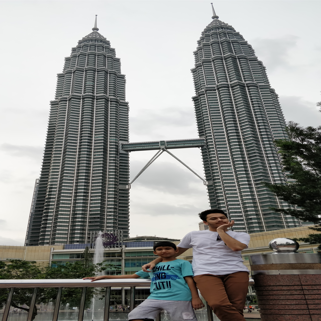

In [8]:
img_loc= '/content/IMG_20180104_170608.jpg'
img = Image.open(img_loc).resize(image_shape)
img

In [9]:
# intensity values have to be in 0-1 (model requirement)
img = np.array(img) / 255.0
img.shape

(321, 321, 3)

In [10]:
# one prediction at a time : add new axis at the start
img = img[np.newaxis, ...]
img.shape

(1, 321, 321, 3)

In [11]:
# prediction
result = classifier.predict(img)
result                                                 #shows list of probablility values

array([[ 0.11734014,  0.06656237,  0.21670969, ...,  0.21727484,
        -0.04035402,  0.10864833]], dtype=float32)

In [12]:
# model has been trained on 98960 classes
result.shape

(1, 98960)

In [13]:
# show name of the max probability value monument
label_map[np.argmax(result)]

'Petronas Twin Towers'

## WebApp: Gradio

In [14]:
class_names=list(label_map.values())

In [15]:
# backend code for webapp
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

In [16]:
# web interface
image = gr.inputs.Image(shape=(321, 321))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(
    classify_image, 
    image, 
    label,
    capture_session=True).launch(debug=True);

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://36599.gradio.app
Interface loading below...


KeyboardInterrupt: ignored